CNN modelleri 4 boyutlu bir veri yapısı bekler: (Örnek Sayısı, Yükseklik, Genişlik, Kanal Sayısı).
- 28, 28: Resmin boyutları.
- 1: Kanal sayısı (Grayscale yani siyah-beyaz olduğu için 1. Eğer renkli/RGB olsaydı 3 olacaktı).

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()

/Users/beyzahiz/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
#Reshape: Görüntüyü 28,28,1 boyutuna getiriyorum
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Normalize: Görüntüyü 0-1 aralığına getiriyorum
X_train_cnn = X_train_cnn.astype('float32') / 255.0
X_test_cnn = X_test_cnn.astype('float32') / 255.0


Conv2D (Convolutional Layer): Görüntünün üzerinde küçük bir pencere (filtre) gezdirerek kenarları, köşeleri ve desenleri yakalar.

MaxPooling2D: Görüntünün boyutunu yarıya indirir. En önemli özellikleri (en yüksek piksel değerlerini) seçer ve hesaplama yükünü azaltır.

Flatten: Artık özellikler yakalandığına göre, 2D matrisi tekrar MLP'nin anlayacağı düz bir liste (vektör) haline getirir.

Dense: Klasik yapay sinir ağı katmanıdır; öğrenilen özellikleri kullanarak sınıflandırma yapar.



In [3]:
from tensorflow.keras import layers,models

model = models.Sequential([
    layers.Conv2D(21, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(42, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#neden iki kere conv ve maxpooling? : Yapay sinir ağları bir resmi tek seferde bütünüyle anlayamaz.
#İlk katmanlar basit özellikleri (kenarlar, köşeler) tanır, sonraki katmanlar bu özellikleri birleştirerek daha karmaşık desenleri tanır.
#Her MaxPooling işlemi resmin boyutunu yarıya indirir.
#filtre sayısı neden artıyor? : İlk katmanda 21 filtre, ikinci katmanda 42 filtre kullanarak modelin daha fazla özellik öğrenmesini sağlıyoruz.
#Daha fazla filtre, modelin daha fazla "detaylı desen" tutabilmesini sağlar.

/Users/beyzahiz/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
    optimizer='adam', #Modelin hata oranını (loss) düşürmek için ağırlıkları (weights) nasıl güncelleyeceğini belirleyen algoritmadır.
    loss='sparse_categorical_crossentropy',
    #Neden "Sparse" olanı seçtik?: Senin etiketlerin (y_train) [5, 0, 4...] gibi tamsayılardan oluşuyor. 
    #Eğer bu rakamlar tamsayı formatındaysa sparse_categorical_crossentropy en uygunudur.
    metrics=['accuracy']
)

In [5]:
history = model.fit(
    X_train_cnn,  #eğitim verileri (28,28,1)
    y_train,  #gerçek etiketler
    epochs=10, 
    batch_size=64,
    validation_split=0.1,  #verinin %10 kontrol için ayrılıyor
    verbose=1  #eğitim sırasında her epoch sonunda kayıp ve doğruluk bilgilerini gösterir.
)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8670 - loss: 0.4449 - val_accuracy: 0.9855 - val_loss: 0.0548
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9816 - loss: 0.0591 - val_accuracy: 0.9848 - val_loss: 0.0502
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9880 - loss: 0.0382 - val_accuracy: 0.9867 - val_loss: 0.0462
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9907 - loss: 0.0290 - val_accuracy: 0.9890 - val_loss: 0.0383
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9930 - loss: 0.0229 - val_accuracy: 0.9842 - val_loss: 0.0529
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9946 - loss: 0.0183 - val_accuracy: 0.9887 - val_loss: 0.0430
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9887 - val_loss: 0.0363
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9969 - loss: 0.0113 - val_accuracy: 0.

In [6]:
model.evaluate(X_test_cnn, y_test)
#modelin daha önce hiç görmediği test verileri (X_test_cnn) üzerinden ne kadar doğru tahmin yaptığını hesaplar.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9885 - loss: 0.0445


[0.03566393256187439, 0.9905999898910522]

In [7]:
y_pred_probs = model.predict(X_test_cnn)
y_pred = y_pred_probs.argmax(axis=1) #modelin her sınıf için verdiği olasılıkları içeren y_pred_probs matrisinden, en yüksek olasılığa sahip sınıfın indeksini alarak y_pred dizisini oluşturur.

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 974    0    0    0    0    0    2    2    1    1]
 [   0 1133    0    0    0    0    2    0    0    0]
 [   0    2 1015    2    1    0    0   11    1    0]
 [   0    0    0 1005    0    3    0    0

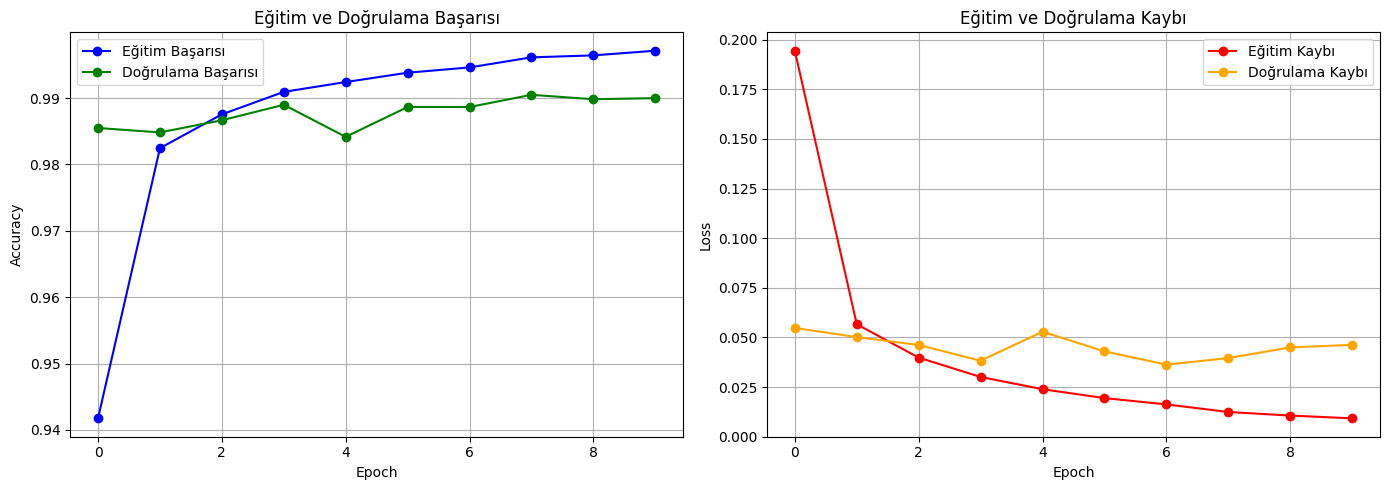

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))

#Accuracy graph
plt.subplot(1,2,1)  #ekranı ikiye böldüm, 1.grafik
plt.plot(history.history['accuracy'], label='Eğitim Başarısı', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Doğrulama Başarısı', color='green', marker='o')
plt.title('Eğitim ve Doğrulama Başarısı')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True) #ızgara çizgisi

#Loss graph
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Eğitim Kaybı', color='red', marker='o')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı', color='orange', marker='o')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout() #sıkı, düzenli yerleşim sağlar
plt.show()


In [ ]:
import numpy as np

y_pred_probs = model.predict(X_test_cnn) #tüm test seti için olasılıklar
y_pred = np.argmax(y_pred_probs, axis=1) #en yüksek olasılık 

print(f"İlk 5 tahmin: {y_pred[:5]}")
print(f"İlk 5 gerçek etiket: {y_test[:5]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Tahmin dizisinin boyutu (shape): (10000,)
İlk 5 tahmin: [7 2 1 0 4]
İlk 5 gerçek etiket: [7 2 1 0 4]
